In [2]:
import sys
sys.path.insert(0, './modules')

# now read in the new function
from HelperFunctions import get_data, mean_abs_error
from preprocessor import preprocessor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Create Model Object

In [3]:
p = preprocessor(cols_to_filter = ['rawcensustractandblock', 'censustractandblock', 'propertyzoningdesc', 'regionidneighborhood', 'regionidzip', 'parcelid'], datecols=['transactiondate'])

gbm = GradientBoostingRegressor(n_estimators = 1000, learning_rate=0.1, max_depth=2, loss='lad', subsample=0.5)

my_model = Pipeline([('preprocessor', p), ('regressor', gbm)])

## Fit Final Model

In [4]:
X_train, y_train = get_data('train')

C:\Users\Asus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
my_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 <preprocessor.preprocessor object at 0x000001ABE89BC9C8>),
                ('regressor',
                 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse',
                                           init=None, learning_rate=0.1,
                                           loss='lad', max_depth=2,
                                           max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=1000,
                                           n_iter_no_change=None,
                          

## Score Test Dataset

In [6]:
X_test, y_test = get_data('test')
y_pred = my_model.predict(X_test)

C:\Users\Asus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Evaluate Model

In [7]:
# using the naive median prediction method
mean_abs_error(y_test, y_train.median())

0.06970475324840694

In [8]:
# using our actual model
mean_abs_error(y_test, y_pred)

0.06922454422933454

it shows that Model have some predictive power

## Model Results Visuliztion

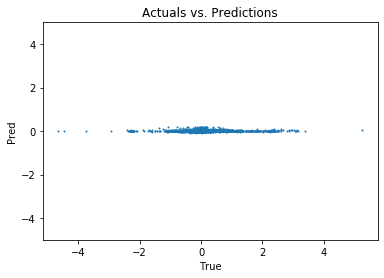

In [16]:
#Actuals VS Predictions
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, s=1)
ax.set_title('Actuals vs. Predictions')
ax.set_xlabel('True')
ax.set_ylabel('Pred')
ax.set_ylim(-5, 5)
plt.show()

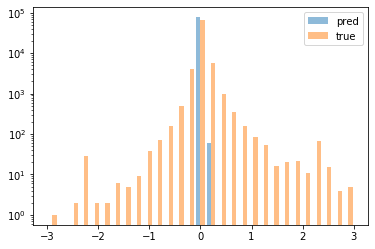

In [18]:
# Distribution of Actuals and Predictions
def plot_hists(y_pred, y_true):

    fig, ax = plt.subplots()
    bins = np.linspace(-3, 3, 30)
    ax.hist([y_pred, y_true], label=['pred', 'true'], alpha=0.5, bins=bins, log=True)
    plt.legend(loc='upper right')
    plt.show()
    
plot_hists(y_pred, y_test)

Model predictions have far less variance that our true response values

## Feature Importance

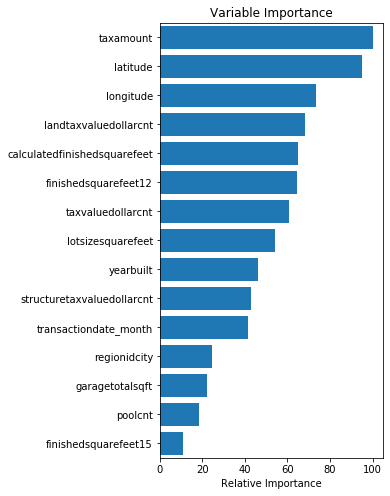

In [10]:
def feat_imp_plot(sk_model, feat_names, N_feature):


    feature_importance = sk_model.feature_importances_
    feature_importance = 100.0 * feature_importance / feature_importance.max()
    sorted_idx = np.argsort(feature_importance)
    total_features = sorted_idx.shape[0]
    pos = np.arange(total_features) + .5

    fig, ax = plt.subplots(figsize=(4,8))
    ax.barh(pos, feature_importance[sorted_idx], align='center')
    ax.set_yticks(pos)
    ax.set_yticklabels(fnames[sorted_idx])
    ax.set_ylim(total_features-N_feature, total_features)
    ax.set_xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
    
fnames = my_model.steps[0][1].transform(pd.DataFrame(X_test.iloc[0]).T).columns
feat_imp_plot(my_model.steps[1][1], fnames, 15)

In [20]:
!mkdir -p models

In [21]:
from sklearn.externals import joblib
joblib.dump(my_model, 'models/model.pkl') 

['models/model.pkl']